# Linear Regression - Ecommerce

Esse projeto foi feito com base no seguinte cenário: 
- Uma empresa que vende roupas online e tem sessões de aconselhamento sobre roupas e estilo na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, em seguida, podem pedir as roupas que desejam pelo aplicativo móvel ou site. A empresa está tentando decidir se concentra seus esforços no aplicativo móvel ou em seu site.

---

# Dados
- **'Email'**: endereço de email do cliente.
- **'Address'**: endereço físico do cliente.
- **'Avatar'**: cor do avatar.	
- **'Avg. Session Length'**: Média Duração da Sessão.
- **'Time on App'**: Tempo no aplicativo.
- **'Time on Website'**: Tempo no site.
- **'Length of Membership'**: Duração da filiação.	
- **'Yearly Amount Spent'**: Quantidade anual gasta.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
customers = pd.read_csv("../input/new-york-ecommerce-customers/Ecommerce Customers")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
report = ProfileReport(customers)
report

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Análise exploratória de dados

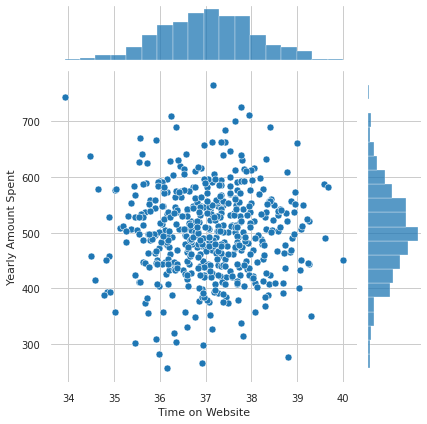

In [5]:
#mais tempo no site, mais dinheiro gasto.
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

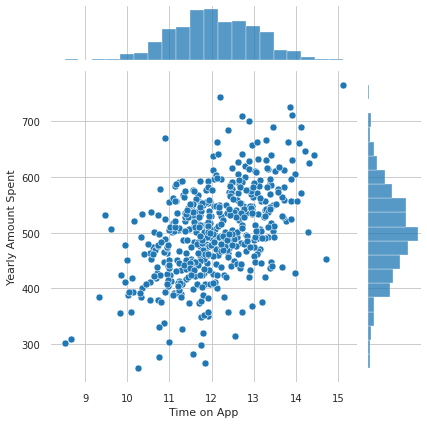

In [6]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

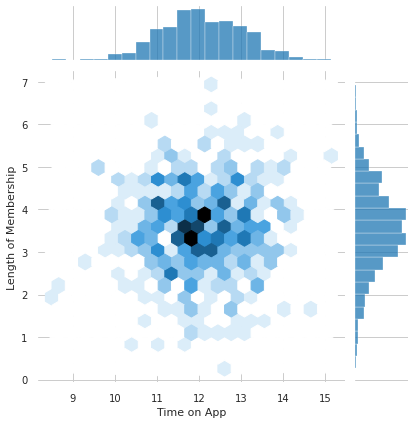

In [7]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

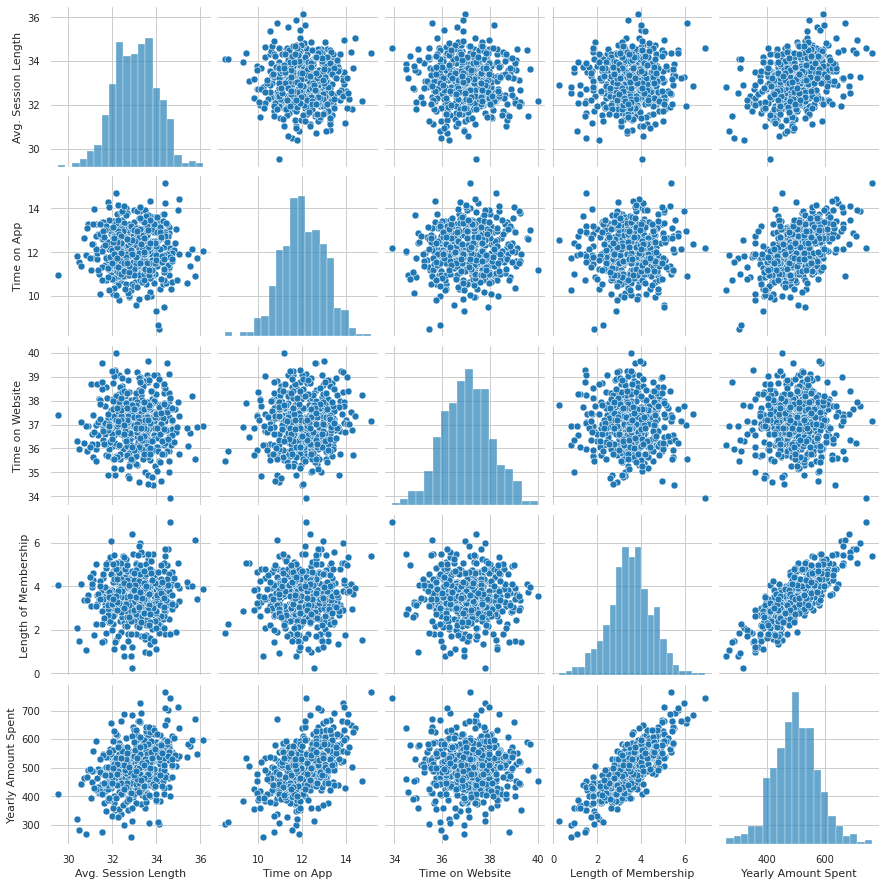

In [8]:
#gastos anuais tem grande relação com tempo de assinatura
sns.pairplot(customers)

# Train Test Split

In [9]:
y = customers['Yearly Amount Spent']

X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Treinando o Modelo

In [10]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# Previsões e Avaliações do modelo

Text(0, 0.5, 'Predicted Y')

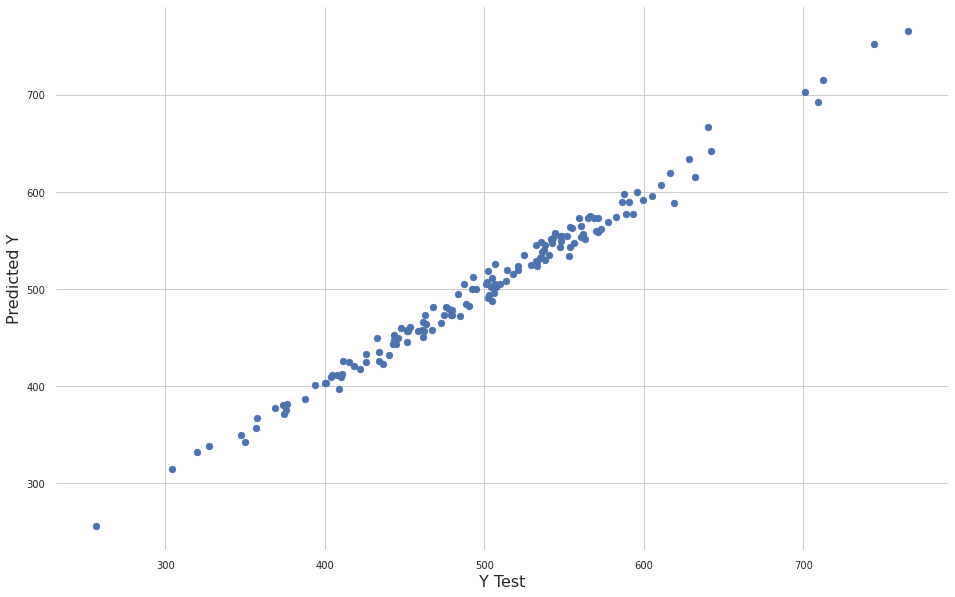

In [11]:
predictions = lm.predict( X_test)
plt.style.use('seaborn-deep')
font = {'size': 30}
f, ax = plt.subplots(figsize=(16,10))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test',fontsize=16)
plt.ylabel('Predicted Y',fontsize=16)

In [12]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430828
MSE: 79.81305165097427
RMSE: 8.933815066978624


In [13]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Interpretando os coeficientes

- Mantendo todos os outros recursos fixos, 1 unidade de **Avg. Session Length** está associada com um **aumento de 25.98 dolares gastos**. 
- Mantendo todos os outros recursos fixos, 1 unidade de **Time on App** está associada com um **aumento de 38.59 dolares gastos**.
- Mantendo todos os outros recursos fixos, 1 unidade de **Time on Website** está associada com um **aumento de 0.19 dolares gastos**.
- Mantendo todos os outros recursos fixos, 1 unidade de **Length of Membership**  está associada com um **aumento de 61.27 dolares gastos**.


# Conclusão

há duas maneiras de se proceder :
- focar no desenvolvimento do site para que ele alcance a performance do app.
- continuar melhorando o app, já que ele é quem mais traz ganhos financeiros para a empresa.